<a href="https://colab.research.google.com/github/DaryaPearl/16s-amplicon-processing/blob/master/L04_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Гиперпараметры и валидация

## Гиперпараметры

Есть параметры, а есть гиперпараметры.

<b>Параметры</b> - т.н. "веса" модели, т.е. то, что подбирается во время обучения. <br>

Например, у нас есть N признаков и мы строим на них линейную регрессию

$$y = w_0 + w_1 x_1 + w_2x_2 +~...~+ w_n x_n$$

В этом случае параметры, это веса $w_i$

В случае SVM параметрами будут веса $c_i$ объектов из тренировочной выборки



<b>Гиперпараметры</b> - те характеристики модели, которые фиксируются до обучения, влияют на процесс обучения, и не меняются сами во время обучения.


$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$


Например, мы уже знакомы с гиперпараметром <b>число соседей</b> в алгоритме kNN и гиперпараметром <b>C</b> в SVM.



## Отбор признаков

*С некоторой точки зрения, набор используемых признаков тоже можно считать гиперпараметром.*

Создадим таблицу 200 на 10000 со "здоровыми" и "больными" пациентами и данными об наличии-отсутствии определенных SNP

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
snp_count = 10000
genes = [f"Gene{ind}" for ind in range(snp_count)]
healthy = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count) ),
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count)) ,
                        columns=genes)
diseased['State'] = "D"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients.head()

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,1,1,0,1,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,H
1,1,0,0,1,0,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,H
2,0,1,1,0,0,1,0,0,0,1,...,0,1,0,1,1,1,0,0,1,H
3,1,0,1,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,0,1,H
4,0,1,1,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,H


In [ ]:
from scipy.stats import pearsonr

In [ ]:
qual = {}
for gene in genes:
    corr = (pearsonr(patients[gene], patients['State'] == "H"))[0]
    qual[gene] = abs(corr)

In [ ]:
genes = sorted(qual, key=lambda x: -qual[x])[0:10]

In [ ]:
for g in genes:
    print(qual[g])

0.26005201560520175
0.24120907566221084
0.24077170617153837
0.24043316991025823
0.23196848599883643
0.23093719733253382
0.2305655793549376
0.2305655793549376
0.2301035699149382
0.23010356991493816


In [ ]:
data_selected = patients[genes]

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(data_selected,
                                                    patients['State'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
(y_pred == Y_test).mean()

0.8

In [ ]:
snp_count = 10000
genes = [f"Gene{ind}" for ind in range(snp_count)]
healthy_2 = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count) ),
                       columns=genes)
healthy_2['State'] = "H"
diseased_2 = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count)) ,
                        columns=genes)
diseased_2['State'] = "D"
patients_2 = pd.concat([healthy_2, diseased_2], axis=0)

In [ ]:
X_test.head()

,Gene1848,Gene2982,Gene6033,Gene3575,Gene9942,Gene239,Gene6223,Gene9253,Gene5486,Gene6202
31,1,1,1,1,1,0,1,1,0,1
27,1,1,1,1,1,1,0,0,1,1
7,1,0,0,0,1,1,0,0,0,0
92,0,1,1,0,1,1,1,1,1,1
10,0,1,0,0,1,1,0,0,1,1


In [ ]:
patients_2.loc[:, genes].head()

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9990,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999
0,1,0,0,1,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,1,1
1,1,0,0,1,1,0,0,0,0,0,...,0,1,1,1,1,0,1,1,0,1
2,0,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,1,1,1,0
3,1,0,1,1,0,1,0,1,1,0,...,0,1,0,1,1,1,0,1,1,1
4,1,1,1,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,0,1,1


In [ ]:
y_pred = model.predict(patients_2[genes])

In [ ]:
(y_pred == patients_2['State']).mean()

0.495

Данные были СЛУЧАЙНЫЕ. Мы не можем предсказывать Y по X, т.к они по определению независимые.

А получился отличный результат.

Потому **нельзя** отбирать признаки на тесте

## Напоминание из статистики

Задача статистики - на основании выборки из генеральной совокупности оценить параметры генеральной совокупности (**inference**)

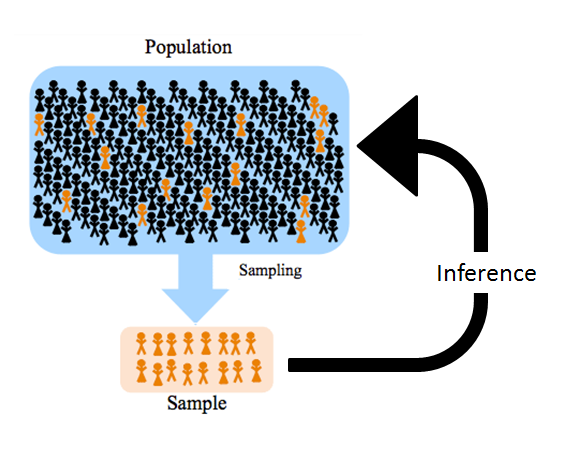

Задача машинного обучения - на основании выборки из генеральной совокупности научиться предсказывать некую характеристику/набор характеристик для любого объекта из генеральной совокупности

## Разбиение данных

Помните, как примерно выглядит пайплайн в машинном обучении?

1. Предобработать данные
2. Обучить модель
3. **Оценить ее качество на генеральной совокупности** - как?
4. Повторить шаги 2-3 пока не получим модель с хорошим качеством
5. **Финально оценить качество полученной модели на генеральной совокупности** - как?

<b>Во время процесса получения оптимальной модели встаёт множество вопросов:</b>

* Какие значения гиперпараметров оптимальные?
* Какой набор признаков позволяет достичь наибольшего качества?
* Как корректно сравнивать разные обученные модели между собой?
* Как, в конце концов, оценить обобщающую способность модели?

Для получения корректных ответов на все эти вопросы сначала необходимо построить правильную схему разбиения данных.

### Все - train

> Дайте мне 4 параметра - и я нарисуя слона. 5 - и он будет вилять хоботом

[Источник](https://fermatslibrary.com/s/drawing-an-elephant-with-four-complex-parameters)


Будем учить модель и тестировать на них же


In [ ]:
X = [0, 1, 2, -2, -3, 5, -6]
Y = [0, 1, 4, 4, 9, 25, 36]

Возьмем модель - **словарь**

In [ ]:
dt = {}
for x, y in zip(X, Y):
    dt[x] = y
dt

Какое качество на обучающей выборке?

In [ ]:
err = 0
for x, y in zip(X, Y):
    y_pred = dt[x]
    err += (y - y_pred) ** 2
print(err)

Идеальное, а как с генерализацией?

In [ ]:
dt[3]

Грустно

### Train-test split


То, что не забывают делать (почти) все.

Разделим данные на обучающую выборку и тестовую.

Учим модель на обучающей выборке, тестируем - на тестовой


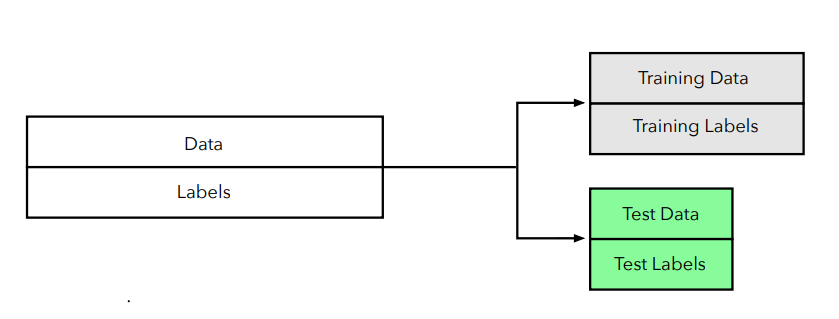

Как бить?

1. **Случайное разбиение** - можно, мы уже делали.

In [ ]:
from sklearn.model_selection import train_test_split

```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)```

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

2. **Стратифициованная выборка**

Бьем так, чтобы соотношение значений целевой переменной (y) была одинаковым в train и test

```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=True, random_state=43)```

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

В обоих предыдущих случаях мы не избегаем **data leakage** - ситуации, когда модель учится предсказывать не зависимость, которую мы хотим, а находит способ хитрить, обходясь запоминанием учебной выборки

**3. Разбиение, опирающееся на знания о домене, в котором вы работает**

Для каждого домена - свои особенности. Рассмотрим позже

### Почему нельзя сделать трейн-тест сплит и подбирать гиперпараметры на тесте?

В таком сценарии происходит переобучение на тестовый датасет, и он по сути превращается в тренировочный для гиперпараметров.

Покажем это

Представим себе, что у нас есть 10000 моделей, полученных подкручиванием разных гиперпараметров. Представим, что все эти модели не работают, т.е. представляют из себя случайное угадывание.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


warnings.filterwarnings('ignore')


def guess_model(y_real, seed=777):
    np.random.seed(seed)
    guessed = np.random.choice([True, False],
                               size=y_real.shape[0],
                               replace=True)
    y_predicted = np.zeros_like(y_real)
    y_predicted[guessed] = y_real[guessed]
    y_predicted[~guessed] = 1 - y_real[~guessed]
    return y_predicted

In [ ]:
np.random.seed(777)
y_real = np.random.choice([0,1], size=250, replace=True)

In [ ]:
import tqdm

In [ ]:
models_num = 10000
best_quality = 0.5

seeds = np.arange(0, models_num)

best_seed = -1
for i in tqdm.tqdm(range(models_num)):
    y_pred = guess_model(y_real, seed=seeds[i])
    q = accuracy_score(y_pred=y_pred, y_true=y_real)
    if q > best_quality:
        best_quality = q
        best_seed = seeds[i]

In [ ]:
print(best_quality, best_seed)

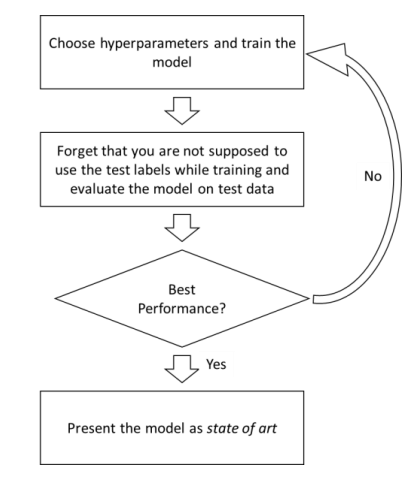

Крутая статья про эту и многие другие ошибки - [Ten ways to fool the masses with machine learning](https://arxiv.org/abs/1901.01686)

Путём подкручивания гиперпараметров на тесте можно получить какой-то мнимый результат, когда модель не рабочая.

#### Следствие 1

Если много людей мучают один и тот же датасет - то что-нибудь получится

> При достаточном долгом переборе среди похожих сущностей, можно найти сущность с нужном качеством на тестовом датасете, при этом являющую собой исключительно нерабочую вещь

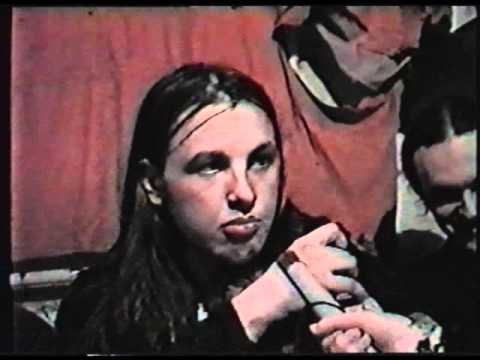

**Решение** - проведение конкурсов на принципиально новых данных. Например, [CASP](https://predictioncenter.org/)

#### Не совсем следствие 2

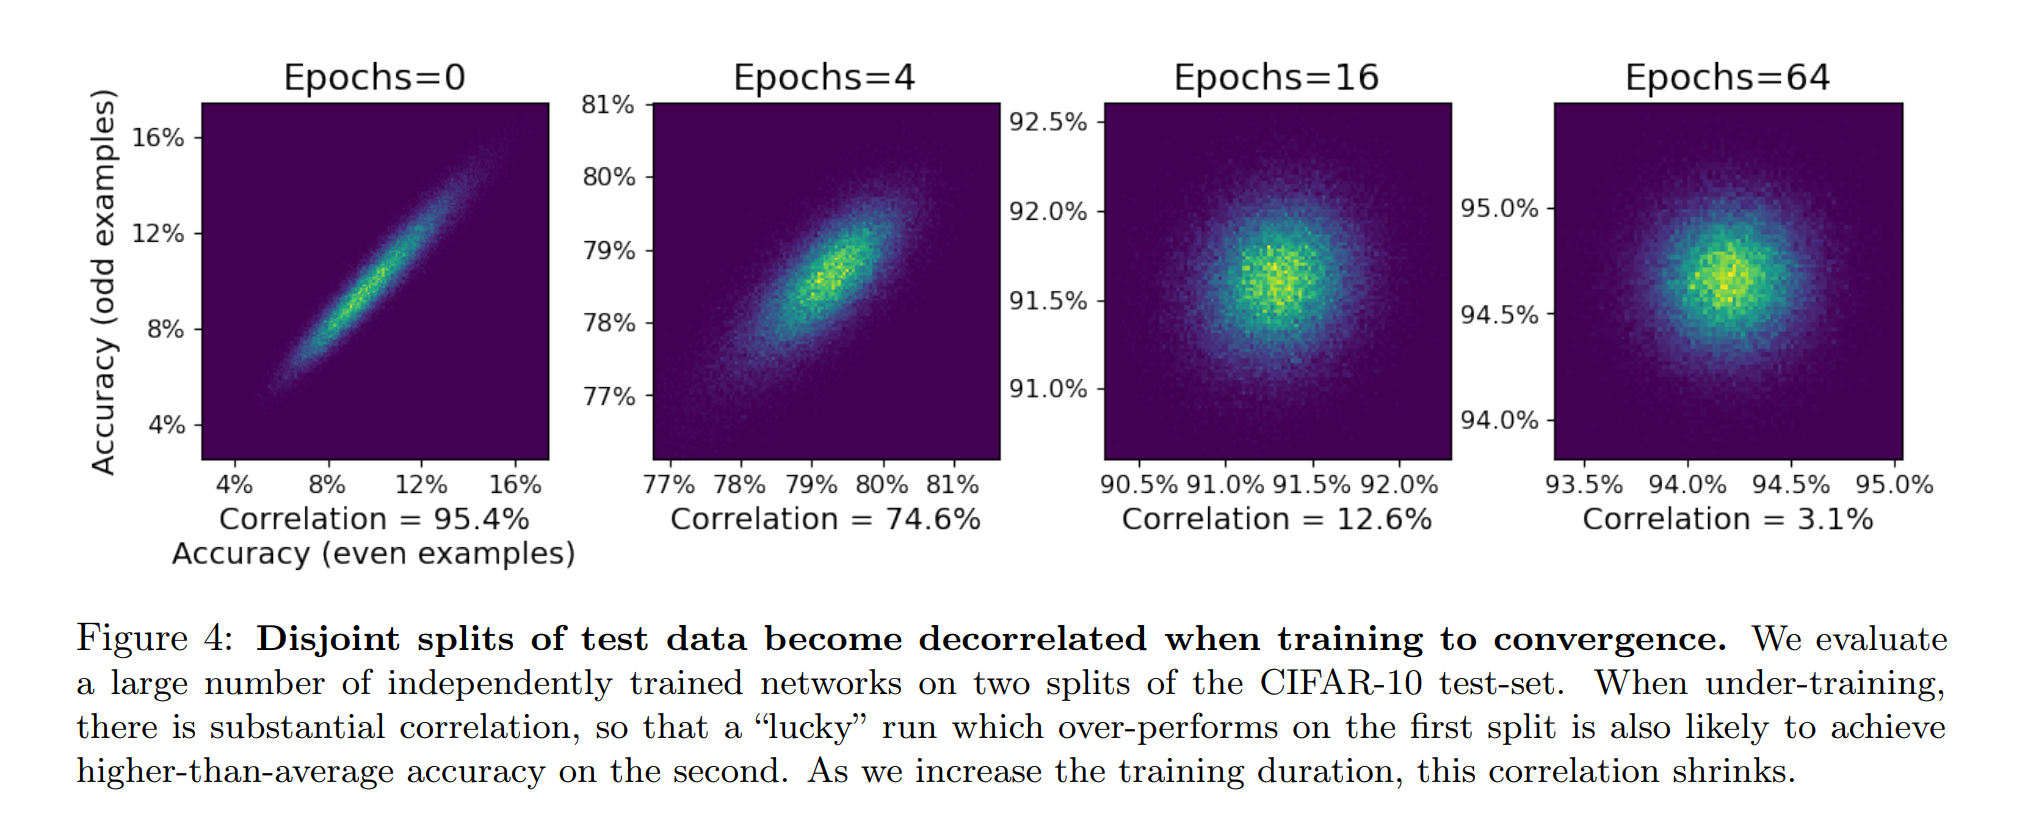

https://arxiv.org/abs/2304.01910

## Holdout Validation (проверка на отложенной выборке)

Просто разбиваем не на 2, а на 3 датасета

Предобработаем данные

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
del breast_cancer

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=203,
                                                  stratify=y_train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Переберем много гиперпараметров

In [ ]:
knn_train_auroc = []
knn_val_auroc = []
sc_train_auroc = []
sc_val_auroc = []

neighbors = np.arange(1, 51, 1)
for knei in neighbors:
    knn = KNeighborsClassifier(n_neighbors=knei)
    knn.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=knn.predict_proba(X_train)[:, 1])
    knn_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=knn.predict_proba(X_val)[:, 1])
    knn_val_auroc.append(val_au)

regularization = np.arange(0.001, 10, 0.5)
for C in regularization:
    sc = SVC(random_state=1, C=C, probability=True)
    sc.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=sc.predict_proba(X_train)[:, 1])
    sc_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=sc.predict_proba(X_val)[:, 1])
    sc_val_auroc.append(val_au)

In [ ]:
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    ax1.set_title('k-Nearest Neighbours', size=22)
    ax1.set_ylabel("AUROC", size=20)
    ax1.set_xlabel("Number of Neighbours", size=20)
    ax1.set_xticks(neighbors[::3])
    ax1.plot(neighbors, knn_train_auroc, c="b", label="Train")
    ax1.plot(neighbors, knn_val_auroc, c="r", label="Validation")
    ax1.legend()
    ax2.set_title('SVC with regularizarion', size=22)
    ax2.set_xlabel('Regularization', size=20)
    ax2.set_xticks(regularization[::7])
    ax2.plot(regularization, sc_train_auroc, c='b', label='Train')
    ax2.plot(regularization, sc_val_auroc, c='r', label='Validation')
    fig.tight_layout()

In [ ]:
max(knn_val_auroc), max(sc_val_auroc)

KNN выиграл

In [ ]:
neighbors[np.argmax(knn_val_auroc)]

Выбрали оптимальные гиперпараметры, а теперь уже проводим итоговую оценку на тестовой датасете

In [ ]:
# Final evaluation

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_score=knn.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

### Плюсы

* Ура, получили какую-то оценку. Для больших датасетов хватает и этого подхода для получения оценки алгоритма

### Минусы

* Точечная оценка, причём чем меньше примеров в валидационном наборе, тем выше
дисперсия. Чем больше примеров - тем меньше примеров остается для обучения модели
* Снижение размера данных, которые попадают в модель при обучении.

## Устойчивость модели

Если вы незначительно поменяли датасет для обучения или гиперпараметры модели, а она резко начала везти себя хуже - это повод для беспокойства.

Либо ваша модель плохо генерализует, либо ваш тестовый датасет очень маленький и изменение классификации одного объекта ведёт к резкому ухудшению качества

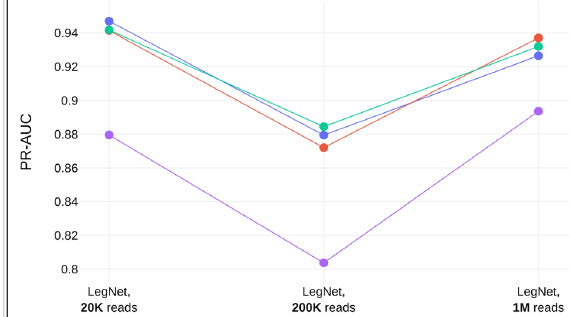

Из картинки кажется, что больше данных сначала хуже - а потом лучше. на самом деле все отличие в качестве моделей - в классификации ~ двух объектов

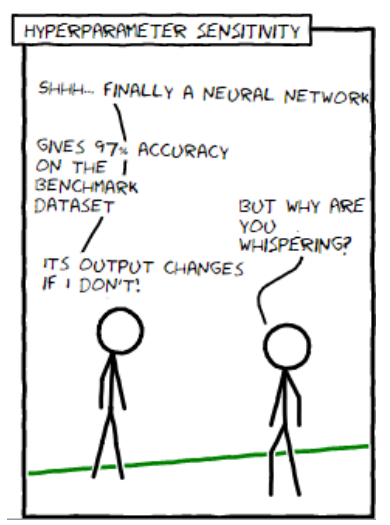

### Сравнение моделей

Сравнивайте вашу модель с ОПТИМИЗИРОВАННЫМИ (гиперпараметры и тд) версия чужих подходов.

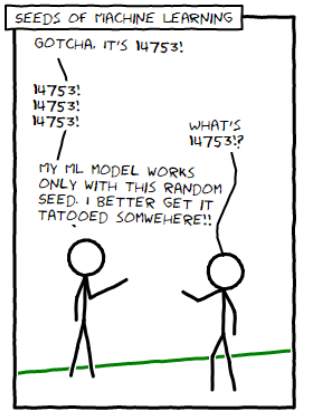

# Data leakage

Просто разбить данные на обучение, валидацию  и тест порой недостаточно.

## Группы объектов

Например, в данных могут быть группы связанных между собой объектов (самое банальное - слабо отличающиеся копии друг друга).

Если разнести объекты в пределах одной группы между обучением и тестом, то даже переобучившаяся модель будет давать на них хорошее качество

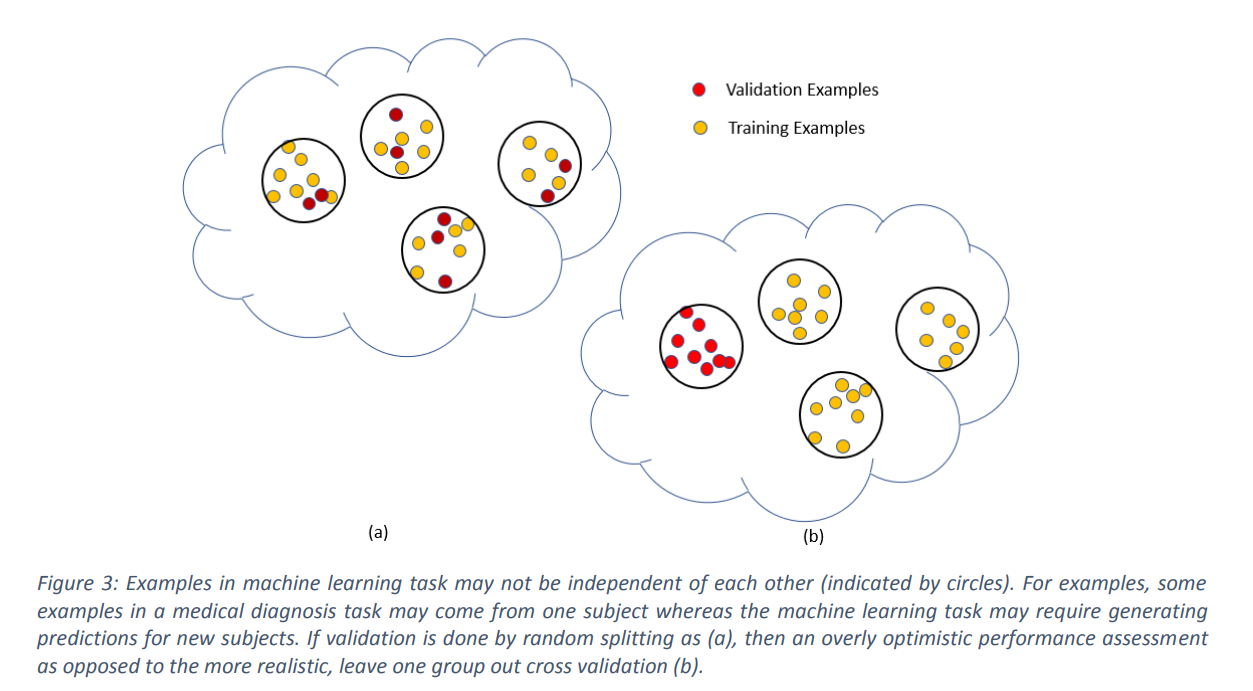

## Признаки-спойлеры



Могут быть признаки, полученные на основе величины, которую мы хотим предсказывать.

В реальности, очевидно, этого признака не будет




Самый простой признак-спойлер - номер столбца в датасете, в котором мы отсортировали объекты по классу.


Или id-шники объектов, полученные с использованием информации о классе

## Leaky preprocessing

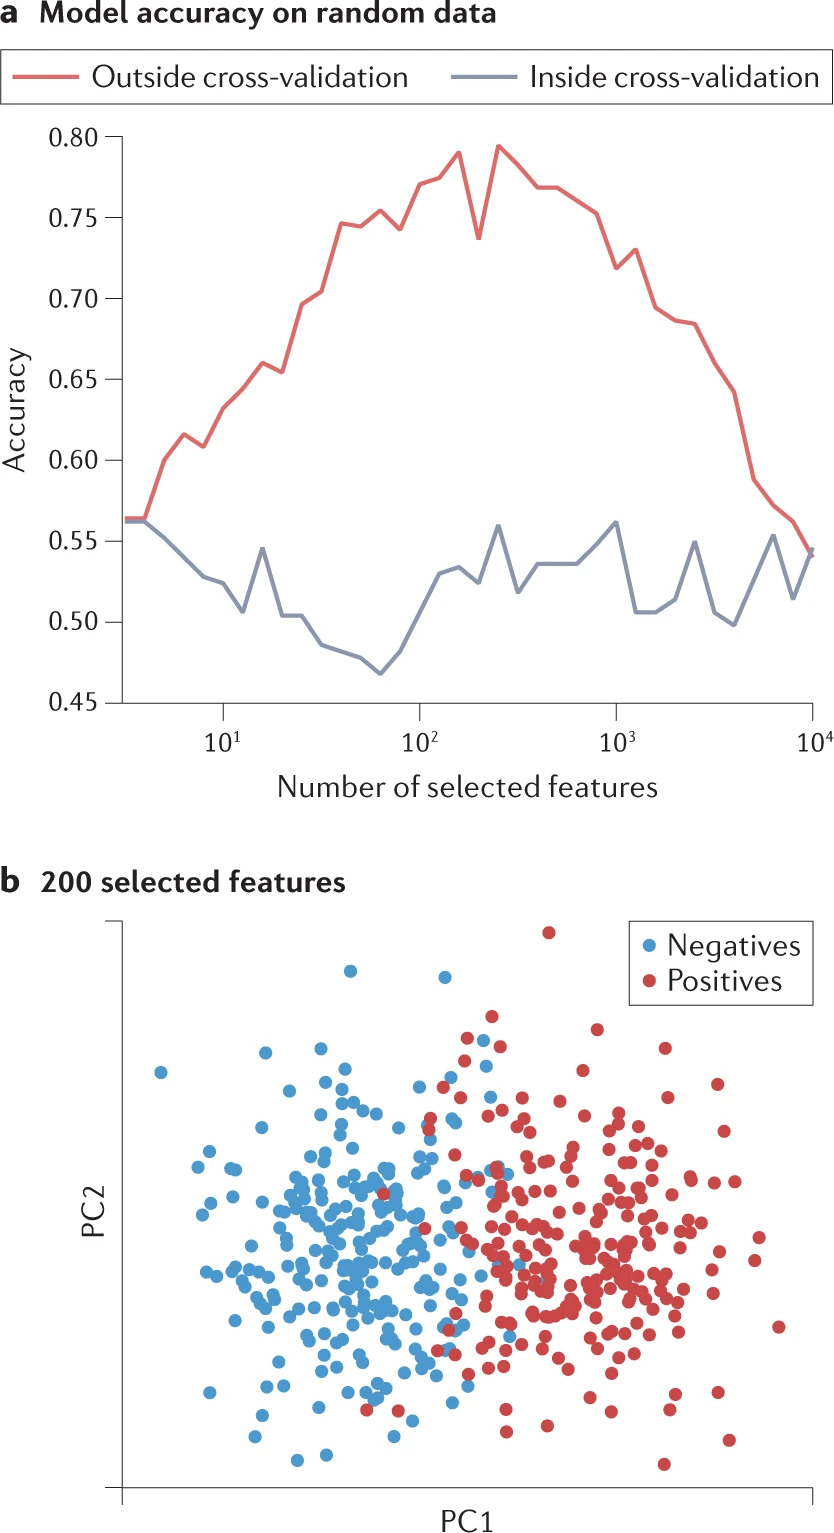

[Статья Шрайбера, Navigating the pitfalls of applying machine learning in genomics](https://www.nature.com/articles/s41576-021-00434-9)

# Особенности валидации с биологическими данными

## Медицинские изображения

Проблема с правильной кросс-валидацией [указывается](https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/), в числе прочих, и среди причин невозможности применения кучи опубликованных моделей для реальной диагностики ковида.

Более того, много статей, к примеру - [из недавних](https://www.nature.com/articles/s42256-021-00307-0) - посвящено тому, как правильно делать исследование на медицинских изображениях. И там упоминается и проблема кроссвалидации.



В снимках могут быть фотографии, полученные от одного пациента. Могут быть снимки с одного прибора, окрашенные одним и тем же специфичным способом и т.д.

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/cross_patient.png" width="500">



## Нуклеотидные последовательности и Biasaway

Очень часто последовательности, содержащие сигнал и без сигнала отличаются по GC-контенту - относительному содержанию нуклеотидов G и C в последовательности.

Особенно этому подвержены ситуации, когда последовательностями без сигнала мы считаем случайным образом взятые последовательности из генома.

Большая часть моделей может легко вывести из поданных им на вход признаков GC-контент и классифицировать выборки на его основании.



In [ ]:
!gdown https://drive.google.com/uc\?id=1TOpoivIwMHEvWm-MSszd2UaYn42-CJt2 -O negative.fasta.gz
!gdown https://drive.google.com/uc\?id=14ts2nq0U1v2cP73npKJQzsG1OHjE_OhS -O positive.fasta.gz

Downloading...
From: https://drive.google.com/uc?id=1TOpoivIwMHEvWm-MSszd2UaYn42-CJt2
To: /content/negative.fasta.gz
100% 10.6M/10.6M [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=14ts2nq0U1v2cP73npKJQzsG1OHjE_OhS
To: /content/positive.fasta.gz
100% 28.6M/28.6M [00:00<00:00, 135MB/s]


In [ ]:
!pip install pyfastx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.9/909.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pyfastx

In [ ]:
fa = pyfastx.Fasta('positive.fasta.gz')
gc_array_pos = []
ind = 0
for seq in fa:
    ind += 1
    gc_array_pos.append(seq.gc_content)
    if ind == 10000:
        break

In [ ]:
fa = pyfastx.Fasta('negative.fasta.gz')
gc_array_neg = []
ind = 0
for seq in fa:
    gc_array_neg.append(seq.gc_content)
    ind += 1
    if ind == 10000:
        break

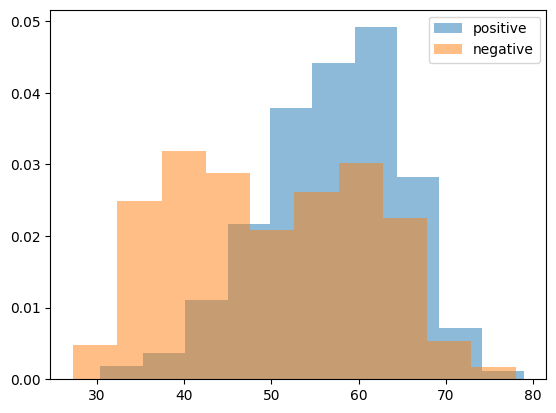

In [ ]:
import matplotlib.pyplot as plt
plt.hist(gc_array_pos, label="positive", density=True, alpha=0.5)
plt.hist(gc_array_neg, label="negative", density=True, alpha=0.5)
plt.legend()
plt.show()

Для борьбы с этим (и похожими проблемами) существует программа [BiasAway](https://biasaway.uio.no/), которая пытается выбрать последовательности из негативной выборки таким образом, чтобы содержание GC между позитивным и негативным классом не отличалось

## Cross-chromosome и cross-cell validation



Когда мы делаем предсказания на геномных данных, необходимо быть ОЧЕНЬ внимательным.

Многие сигналы, такие как доступность хроматина, опасность мутаций в позиции и т.д обладают выраженной локальностью - по рядом стоящей позиции можно с большой достоверностью предсказать значение в текущей позиции.

Некоторые сигналы более-менее сохраняют свое значение на больших участках генома, а модели машинного обучения склонны легко запоминать конкретные последовательности и "составлять" внутри себя карту генома.


Представим себе ситуацию, что у нас есть данные двух клеточных линий для всех хромосом

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/genome_cross0.png" width="600">

Как мы можем разбить наши данные на обучение и тест?

### Случайное разбиение

Не рекомендуется - модель почти наверняка переобучится

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/genome_cross1.png" width="600">

### Разбиение по клеточным линиям

Лучше, но надо сравниваться с предсказанием среднего по линиям, на которых училась модель

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/genome_cross2.png" width="600">

### Разбиение по хромосомам

Хороший вариант, ловит почти все проблемы

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/genome_cross3.png" width="600">

### Разбиение по длинным участкам

Можно в обучение брать одни протяженные участки, а в тест - другие.
Проблема - можно обмануться с необходимым размером.

Достаточно безопасно брать половинки хромосом

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/genome_cross4.png" width="600">

### TargetFinder

Представим себе следующую задачу:
1) дана последовательность энхансера
2) дана последовательность промотора
3) предсказать, будут ли они взаимодействовать

Автор TargetFinder в данной задаче смогли добиться точности порядка 99% процентов. Кажется подозрительным.

И в скором времени вышла статья, где было показано, что все качество авторов происходит из-за неправильного разбиения данных.
В выборку попадали последовательности из одной и той же хромосомы, более того, один и тот же промотор/энхансер могли быть как в обучении, так и в тесте.

Признаки, которые они предложили, позволяли модели легко запоминать конкретные промоторы и энхансеры, понимать, что лежит в окружении того или иного регуляторного участка.

Как было показано, что в модели есть проблемы - просто предложили два разбиения - кросс-хромосомное, когда в тест попадали пары промотор-энхансер только с одних хромосом, а в трейн - с других.

И второе - где хотя бы гарантировалось, что один и тот же промотор будет либо только в тесте, либо только в обучении.

Второе разбиение было более мягким - на нем модель все равно находила "как переобучиться". На кросс-хромосомном уровне data leakage убирался полностью.

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/crosschromosome.png" width="700">


### A pitfall for machine learning methods aiming to predict across cell types

Аналогичный эффект был [продемонстрирован](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02177-y) при попытке обучить модель, предсказывающую, какие гены будут значимо экспрессироваться в клеточной линии. "Лучшим" предсказанием сигнала для определенной клеточной линии оказывается просто предсказание для данного гена среднего по остальным клеточным линиям.

Модель же "стремится" к идеалу - чем больше ей дается параметров, тем лучше она запоминает и тем больше ее предсказание становится похоже на среднее

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/expression.png" width="700">

### Avocado

В [статье](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-01977-6) используют неправильные разбиения, что были еще в TargetFinder

![alttext](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs13059-020-01977-6/MediaObjects/13059_2020_1977_Fig5_HTML.png?as=webp)

### CAGI2018

Авторы конкурса недооценили размер блоков, на которые надо резать геномные данные (**A**) и в итоге модель уучила не признаки, важные для предсказания эффекта мутации, а призниак, важные для предсказания, какой объект из обучающей выборки был ближе **по геному**.

Соответственно, при правильных разбиениях большая часть моделей [показывали](https://www.frontiersin.org/articles/10.3389/fgene.2019.01078/full) куда меньшее качество и были не переносимы на реальные данные, где все последовательности относятся к тем, которые модели не видели

<img src="https://www.frontiersin.org/files/Articles/485085/fgene-10-01078-HTML/image_m/fgene-10-01078-g001.jpg" width="600">

В результате, даже модель, обученная на абсолютно случайных признаках, показывала качество лучше многих конкурсных решений

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/cagi2018_fakesig.png" width="500">

## Разбиение химических веществ

### Разные разбиения - разные результаты

Аналогичная проблема может возникнуть и при разбиении химических веществ.

Допустим, что вы хотите предсказывать связывание белка с веществом

В [статье](https://arxiv.org/abs/1703.10603) приводят пример, что в зависимости от того, как разбить комплексы белков с веществами на обучение и тест, оценка качества может меняться очень разными путями.

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/chemsplit.png" width="700">

### Датасеты могут быть разные по качеству

Бывают хорошие датасеты, где для каждого белка известны как ингибиторы, так и вещества ими неявляющимися. И для каждого вещества известны и белки, с которыми оно связывается, и с которыми нет.
В этом случае может повезти - и любое разбиение будет давать вам хорошее качество

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/chembase1.png" width="700">





Бывают же датасеты, где для каких-то веществ изввестны только белки, которые они ингибируют (ученые любят сообщать об успехах, а не о неудачах) или белки, для которых известны только ингибиторы (или ингибиторов неизвестно).

В этом случае без правильного разбиения - хорошо оценить качество модели не получится.

### Разбиение по веществу

Информация про одно и то же вещество идет либо только в обучение, либо только в тест.

### Разбиение по scaffold

Разбиение по структуре вещества. Например, на основании [Bemis-Murcko scaffold](https://docs.chemaxon.com/display/docs/bemis-murcko-clustering.md)


<img src="https://docs.chemaxon.com/display/docs/images/download/attachments/1806297/bm1.jpg" width="500">

### Разбиение по белку

Комплексы одного и того же белка идут либо только в обучении, либо в тест.

### Разбиение по семействам

Есть разные разбиения белков на классы по похожести.

Можем брать белки из одного класса либо только в обучение, либо только в тест. Или можно напрямую контролировать, чтобы похожесть между последовательностями в обучении и тесте не была больше заданного порога



![alttext](https://d3i71xaburhd42.cloudfront.net/67fdfd931031a2cce96e5f1d06369e06ce9e6bae/8-Figure3-1.png)

## Медицинские записи

В медицинских записях так же [могут](https://www.sciencedirect.com/science/article/pii/S153204641830073X) встречаться полные дупликаты или почти-дупликаты. Если не очистить датасет от них предварительно или не обеспечить праавильного разбиения - получится неправильная оценка качества модели

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S153204641830073X-fx1_lrg.jpg" width="600">

## RNA-Seq

Бывает и [такое](https://www.biorxiv.org/content/10.1101/2020.09.09.290395v1.full)

>The testing data was held by a separate analysis group
using a different computer system to avoid any possibility
of inadvertent use of test data in the model building
process.



Но вообще проблема серьезная. На прошой лекции уже был пример

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl" -O gse53625_expression.csv && rm -rf /tmp/cookies.txt

--2023-10-26 14:52:09--  https://docs.google.com/uc?export=download&confirm=t&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl
Resolving docs.google.com (docs.google.com)... 173.194.215.101, 173.194.215.102, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/duum7ecpvm7bnr340q843q9g7tpvv4jq/1698331875000/10688067377005935076/*/1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl?e=download&uuid=7aa4118e-c0cd-4b60-97b4-77ef076ab86c [following]
--2023-10-26 14:52:09--  https://doc-0g-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/duum7ecpvm7bnr340q843q9g7tpvv4jq/1698331875000/10688067377005935076/*/1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl?e=download&uuid=7aa4118e-c0cd-4b60-97b4-77ef076ab86c
Resolving doc-0g-50-docs.googleusercontent.com (doc-0g-50-docs.googleusercontent.com)... 173.194.215.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N' -O gse53625_metadata.csv

--2023-10-26 14:52:12--  https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N
Resolving docs.google.com (docs.google.com)... 173.194.215.101, 173.194.215.102, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1p6d7v8gdtd6h0lv3g468o0ibtv3mc6i/1698331875000/10688067377005935076/*/1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N?e=download&uuid=799d8366-07aa-4a14-98a0-d6335876ee52 [following]
--2023-10-26 14:52:12--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1p6d7v8gdtd6h0lv3g468o0ibtv3mc6i/1698331875000/10688067377005935076/*/1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N?e=download&uuid=799d8366-07aa-4a14-98a0-d6335876ee52
Resolving doc-0c-50-docs.googleusercontent.com (doc-0c-50-docs.googleusercontent.com)... 173.194.216.132, 2607:

In [ ]:
escc = pd.read_csv("./gse53625_expression.csv", index_col=0)
escc_meta = pd.read_csv("./gse53625_metadata.csv", index_col=0)

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def draw_pca_chart(df: pd.DataFrame, y_column=None, normalize=True, vis_type="PCA", seed=42):
    assert vis_type.lower() in ["pca", "tsne", "umap"], "Incorrect visualization type/ Allowed: 'pca', 'tsne', 'umap'"

    df = df.copy()
    if y_column is None:
        y = pd.Series(index=df.index, data=0, name=None)
    elif isinstance(y_column, str):
        assert y_column in df.columns, f"{y_column} is not in DataFrame"
        y = df.pop(y_column)
    elif isinstance(y_column, pd.Series):
        y = y_column
    df = df.select_dtypes(include=np.number)
    X = df.values

    if normalize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    if vis_type.lower() == "pca":
        pca = PCA(n_components=2) # no kernel pca
        X_transf = pca.fit_transform(X)
    elif vis_type.lower() == "tsne":
        tsne = TSNE(n_components=2, random_state=seed) # no distance
        X_transf = tsne.fit_transform(X)
    elif vis_type.lower() == "umap":
        um = umap.UMAP(n_components=2, random_state=seed) # no distance
        X_transf = um.fit_transform(X)

    df = pd.DataFrame({"Component 1": X_transf[:,0],
                       "Component 2": X_transf[:,1],
                       y.name: y})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Component 1", y="Component 2", hue=y.name, data=df, alpha=0.75)
    plt.title(f"{vis_type} analysis", fontsize=16)

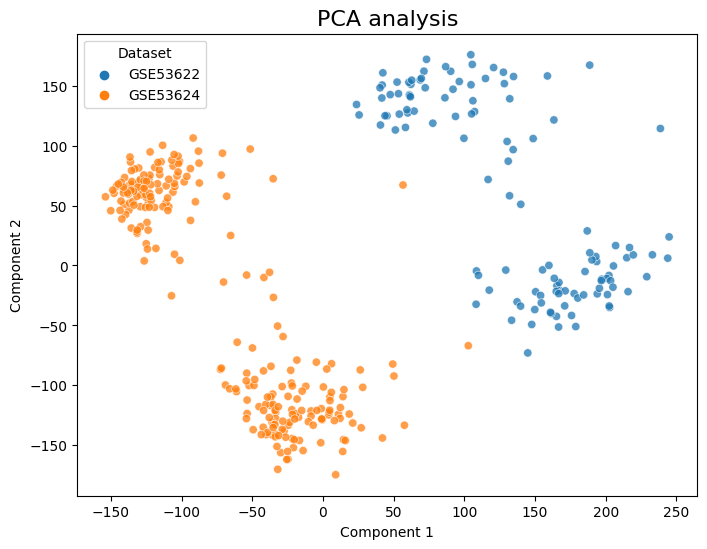

In [ ]:
draw_pca_chart(escc.T, escc_meta["Dataset"], normalize=False)

Решить эту можно по-разному. Но она не всегда решается и не всегда **можно заметить**, что она не решилась.

Потому правила те же - бить данные по пациентам/больницам и тд.

## Гомологичные последовательности

При работе с белковыми последовательностями также стоит учитывать то, что они могут образовывать кластеры очень похожих друг на друга последовательностей.
Обычно, чем меньше похожесть последовательностей из трейна и теста друг на друга, тем сложнее оказывается задача.

Например, в [задаче предказания GO-аннотации](https://www.nature.com/articles/s41598-020-80786-0) качество модели падает (местами дяо качеста классических методов), по мере увеличения похожести между обучением и тестом

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/go_pred.png" width="700">



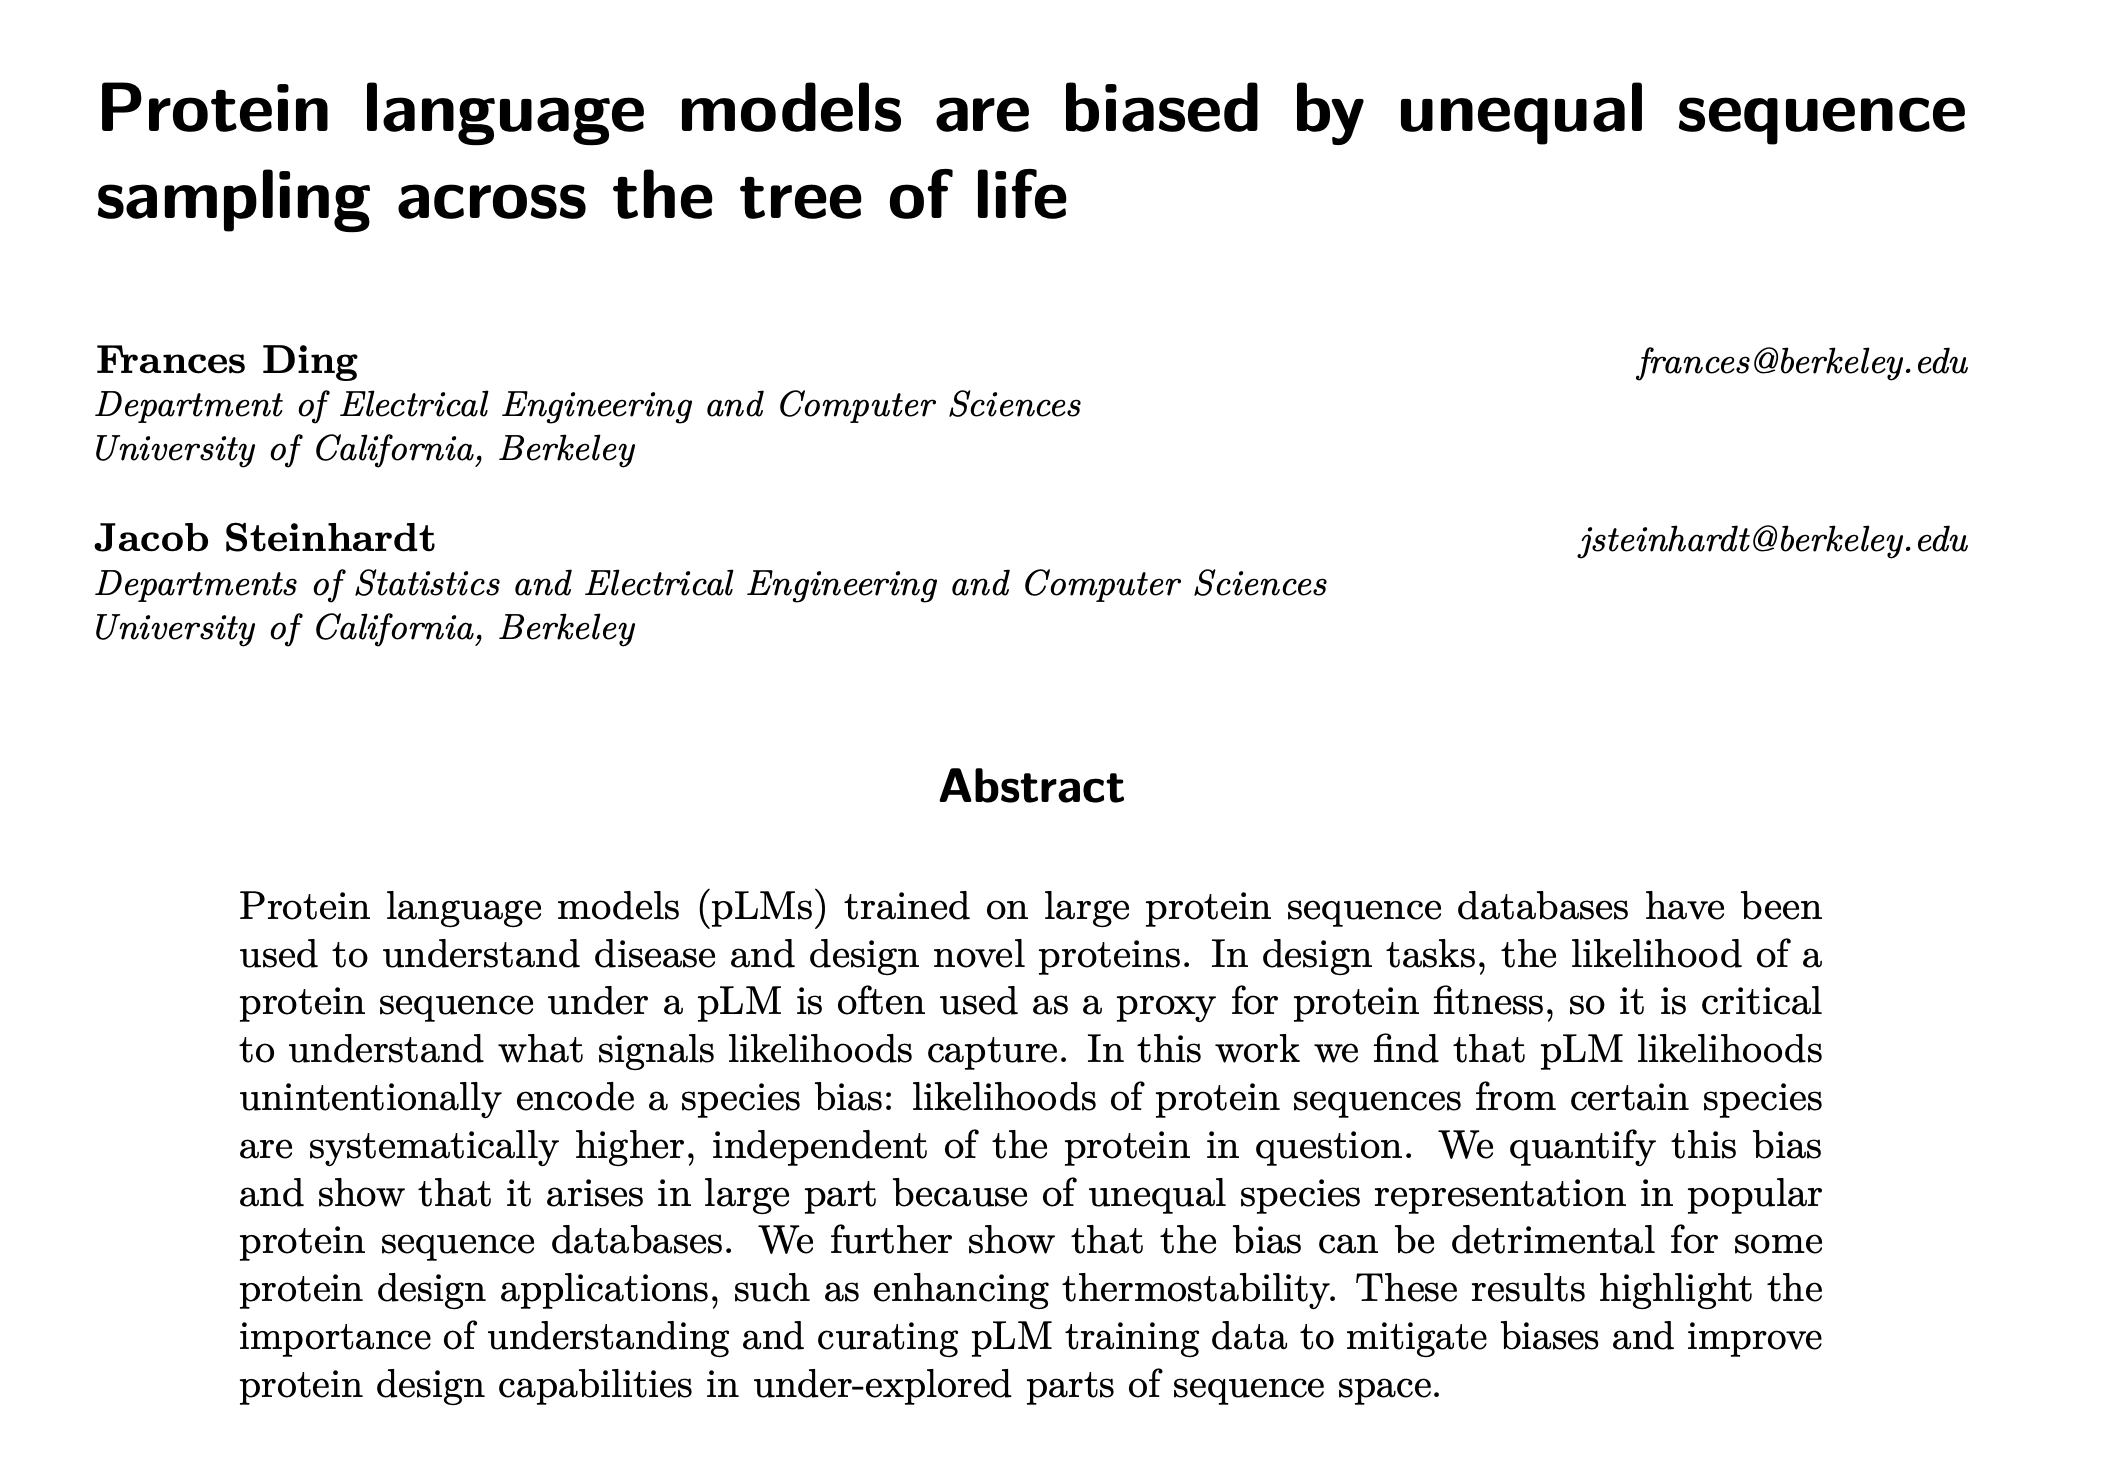

https://www.biorxiv.org/content/10.1101/2024.03.07.584001v1

#### Не всегда учета гомологичных последовательностей достаточно

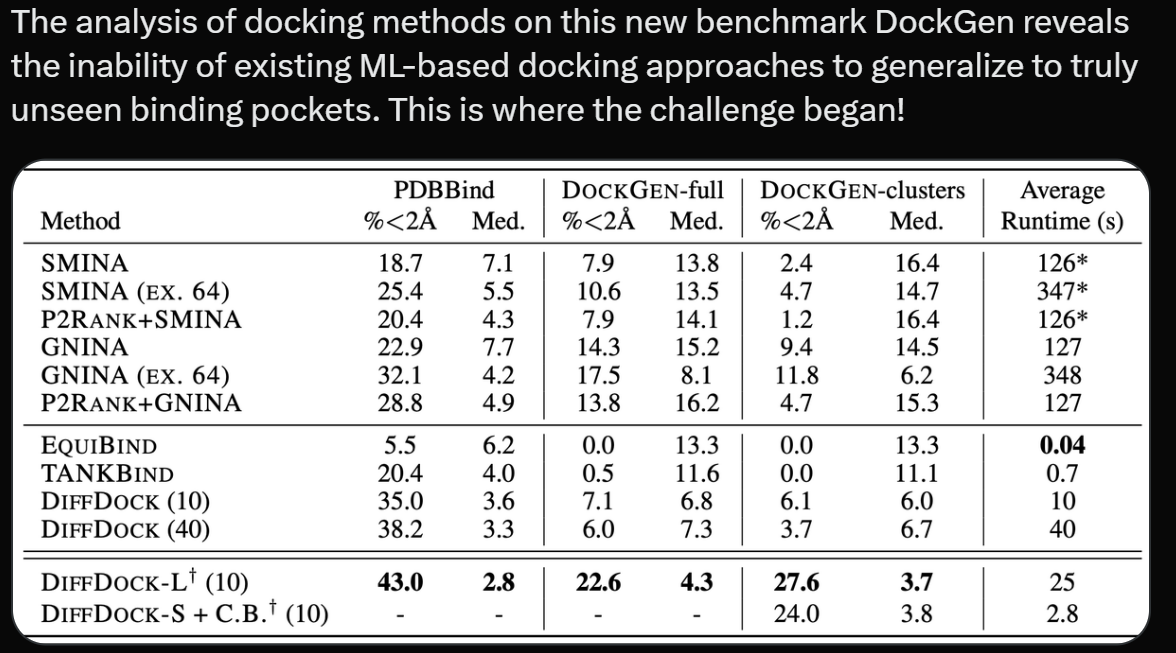

https://arxiv.org/abs/2402.18396

## Общая рекомендация

Всегда думайте, что в Вашей задаче является источником распределения, генерирующего данные. Отсюда вытекают cross-chromosome, cross-cell line, cross-patient и прочие валидации...

В [статье](https://pubs.acs.org/doi/10.1021/acs.jcim.9b00554) была предложена модель для сравнения активных сайтов белка.

<img src="https://pubs.acs.org/cms/10.1021/acs.jcim.9b00554/asset/images/medium/ci9b00554_0008.gif">

Авторы разбили имеющийся набор известных структур на обучение и тест по схожести последовательностей белков. После этого модель обучалась предсказывать, похожи для два активных сайта белка.

В чем ошибка в разбиении авторов?

